In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#songs = pd.read_csv('D:\justi\Documents\msd\songs.csv')
#addnl = pd.read_table('./data/tagtraum/msd_tagtraum_cd1.cls/msd_tagtraum_cd1.txt', sep='\t', skiprows=7, names=['track_id', 'Tag1', 'Tag2'])

In [63]:
#Reading the data
csv_path = "Desktop/UVA/Fall/Data_Mining/Assignment/Final Project/data/songs.csv"
songs = pd.read_csv(csv_path)
songs.head()

,Unnamed: 0,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,...,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid,idx_artist_mbtags,year
0,0,22050,66ce14f4a4d647318d8886dc49eafed4,0.0,146.91220,0.268,0.0,0,0,0,...,0,0,Sugar_ Sugar,769519,NaN,SOYHVGK12AB018A85C,Melody Hill,8522639,0,1969
1,1,22050,99adb4a09dbf8e674d3a0cbe29be8725,0.0,211.59138,0.000,0.0,0,0,0,...,0,0,Further,312013,NaN,SOXLFQD12A8C141927,Tranquillizer,3521635,0,1997
2,2,22050,7d59a0ab2af02da6186a3f888523ab42,0.0,186.95791,0.000,0.0,0,0,0,...,0,0,Skip School_ Start Fights,775990,0.768139,SOCSITI12AC3DF7F35,Breathe In,8585431,0,2008
3,3,22050,5712e954dd6e9e3265b14b51f030372e,0.0,222.87628,0.000,0.0,0,0,0,...,0,0,Live At The Fillmore East,296683,NaN,SOKNJZO12A8C139449,It's No Secret,3348907,0,1966
4,4,22050,19a1d23af6018cdfb32e8e751932d662,0.0,262.58240,2.328,0.0,0,0,0,...,0,0,The Lost Souls Bonus EP,722229,NaN,SOFFLLP12AB018ED52,Sajana (Ft Faheem Mazhar),8005714,0,0


In [64]:
#https://speakerdeck.com/hendriks73/improving-genre-annotations-for-the-million-song-dataset?slide=55
trk2 = pd.read_table('Desktop/UVA/Fall/Data_Mining/Assignment/Final Project/data/msd_tagtraum_cd2c.cls', sep='\t', skiprows=7, names=['track_id', 'Tag1', 'Tag2'])
trk2.head()
print(len(trk2))
trk2.groupby(['Tag1']).size().reset_index(name='Freq').sort_values("Freq",ascending=False)

191401


,Tag1,Freq
13,Rock,75013
2,Electronic,21865
4,Jazz,14700
8,Pop,12967
10,Rap,11001
12,RnB,9811
6,Metal,9224
1,Country,8983
11,Reggae,7970
0,Blues,6219


In [65]:
df_m = songs.merge(trk2, on='track_id')
df_m.groupby(['Tag1']).size().reset_index(name='Freq').sort_values("Freq",ascending=False)

,Tag1,Freq
13,Rock,1801
2,Electronic,543
4,Jazz,368
8,Pop,344
10,Rap,273
12,RnB,240
1,Country,228
6,Metal,217
11,Reggae,192
0,Blues,162


In [66]:
df_m.shape

(4726, 56)

In [67]:
df_m.iloc[1,:]

Unnamed: 0                                                           1
analysis_sample_rate                                             22050
audio_md5                             99adb4a09dbf8e674d3a0cbe29be8725
danceability                                                         0
duration                                                       211.591
end_of_fade_in                                                       0
energy                                                               0
idx_bars_confidence                                                  0
idx_bars_start                                                       0
idx_beats_confidence                                                 0
idx_beats_start                                                      0
idx_sections_confidence                                              0
idx_sections_start                                                   0
idx_segments_confidence                                              0
idx_se

There are several categoricals that should be removed as they are not appropriate for the analysis we want to calculate. For example, track names, artist name and album name are all unuseful. Additionally, everything with an
idx label can be dropped as the data is incomplete. Finally, any value that does not change can be removed.

In [68]:
df_m.drop(columns = ['Unnamed: 0','genre', 'artist_mbid', 'artist_name','release', 'release_7digitalid', 'audio_md5', 'track_id',
                     'song_id', 'title', 'track_7digitalid', 'Tag2', 'artist_id', 'artist_7digitalid', 'artist_playmeid'], inplace = True)

In [69]:
cols = [c for c in df_m.columns if c[0:3] != 'idx']
df_m=df_m[cols]
df_m.head()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,...,time_signature_confidence,analyzer_version,artist_familiarity,artist_hotttnesss,artist_latitude,artist_location,artist_longitude,song_hotttnesss,year,Tag1
0,22050,0.0,146.91220,0.268,0.0,7,0.943,-11.720,1,0.693,...,0.000,NaN,0.640610,0.452912,NaN,NaN,NaN,NaN,1969,Pop
1,22050,0.0,211.59138,0.000,0.0,7,0.488,-7.446,1,0.677,...,0.778,NaN,0.531736,0.409133,57.15382,"Aberdeen, Scotland",-2.10679,NaN,1997,Rock
2,22050,0.0,186.95791,0.000,0.0,1,0.840,-2.445,1,0.846,...,0.554,NaN,0.797571,0.562733,NaN,NaN,NaN,0.768139,2008,Rock
3,22050,0.0,222.87628,0.000,0.0,3,0.893,-10.210,1,0.631,...,0.271,NaN,0.818745,0.539509,37.77916,"San Francisco, California",-122.42005,NaN,1966,Rock
4,22050,0.0,156.96934,0.322,0.0,4,0.772,-20.816,0,0.524,...,0.168,NaN,0.929030,0.750427,54.31407,UK,-2.23001,0.652836,0,Rock


In [70]:
cols = [c for c in df_m.columns if df_m[c].nunique() >1]
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,artist_latitude,artist_location,artist_longitude,song_hotttnesss,year,Tag1
0,146.91220,0.268,7,0.943,-11.720,1,0.693,135.982,145.521,1,0.000,0.640610,0.452912,NaN,NaN,NaN,NaN,1969,Pop
1,211.59138,0.000,7,0.488,-7.446,1,0.677,200.783,84.530,4,0.778,0.531736,0.409133,57.15382,"Aberdeen, Scotland",-2.10679,NaN,1997,Rock
2,186.95791,0.000,1,0.840,-2.445,1,0.846,177.575,92.426,4,0.554,0.797571,0.562733,NaN,NaN,NaN,0.768139,2008,Rock
3,222.87628,0.000,3,0.893,-10.210,1,0.631,222.876,130.480,3,0.271,0.818745,0.539509,37.77916,"San Francisco, California",-122.42005,NaN,1966,Rock
4,156.96934,0.322,4,0.772,-20.816,0,0.524,142.286,127.547,1,0.168,0.929030,0.750427,54.31407,UK,-2.23001,0.652836,0,Rock


In [71]:
df_m.shape

(4726, 19)

The artist features should also be dropped. The analysis here is using song information.

In [72]:
cols = [c for c in df_m.columns if c[0:6] != 'artist']
df_m=df_m[cols]
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,song_hotttnesss,year,Tag1
0,146.91220,0.268,7,0.943,-11.720,1,0.693,135.982,145.521,1,0.000,NaN,1969,Pop
1,211.59138,0.000,7,0.488,-7.446,1,0.677,200.783,84.530,4,0.778,NaN,1997,Rock
2,186.95791,0.000,1,0.840,-2.445,1,0.846,177.575,92.426,4,0.554,0.768139,2008,Rock
3,222.87628,0.000,3,0.893,-10.210,1,0.631,222.876,130.480,3,0.271,NaN,1966,Rock
4,156.96934,0.322,4,0.772,-20.816,0,0.524,142.286,127.547,1,0.168,0.652836,0,Rock


Finally. While they aren't necessarily out of the scope of the analysis. Given that this objective is meant to be used as a tool to predict new songs it seems the information provided cannot be used so they will be dropped

In [73]:
df_m.drop(columns = ['song_hotttnesss', 'year'], inplace = True)

In [74]:
df_m.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,Tag1
0,146.91220,0.268,7,0.943,-11.720,1,0.693,135.982,145.521,1,0.000,Pop
1,211.59138,0.000,7,0.488,-7.446,1,0.677,200.783,84.530,4,0.778,Rock
2,186.95791,0.000,1,0.840,-2.445,1,0.846,177.575,92.426,4,0.554,Rock
3,222.87628,0.000,3,0.893,-10.210,1,0.631,222.876,130.480,3,0.271,Rock
4,156.96934,0.322,4,0.772,-20.816,0,0.524,142.286,127.547,1,0.168,Rock


In [75]:
df_m.loc[:, df_m.isna().any()].head()

""
0
1
2
3
4


Since there are no na values, we can proceed with further analytical measures

In [76]:
df_m['Tag1'].nunique()

15

Now that we have useable variables. They can be explore

### Looking at distributions of different values at different categories

#### Loudness

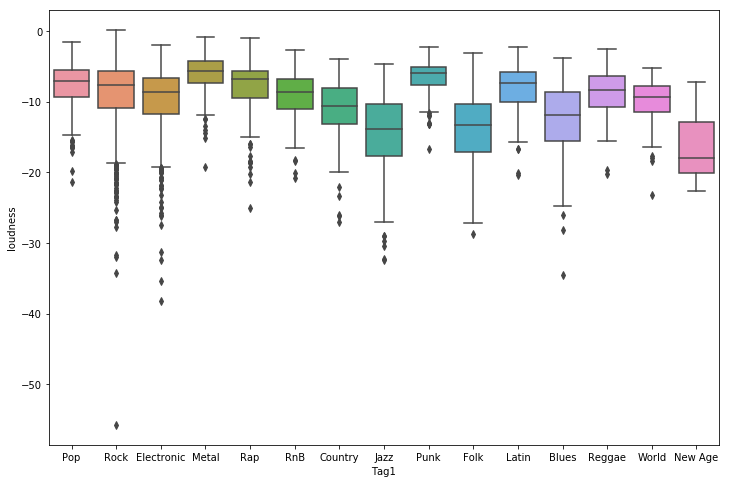

In [60]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='loudness', ax = ax)

We can observe that New Age seems to have the drastically different and small mean values for loudness.

#### Duration

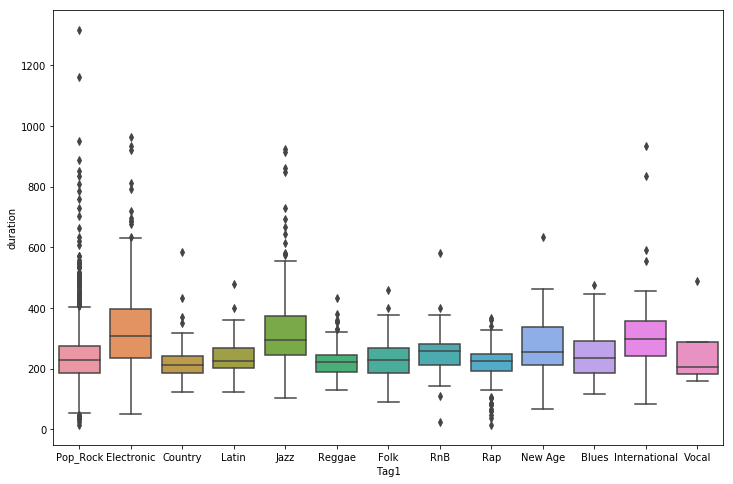

In [36]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='duration', ax = ax)

#### start_of_fade_out

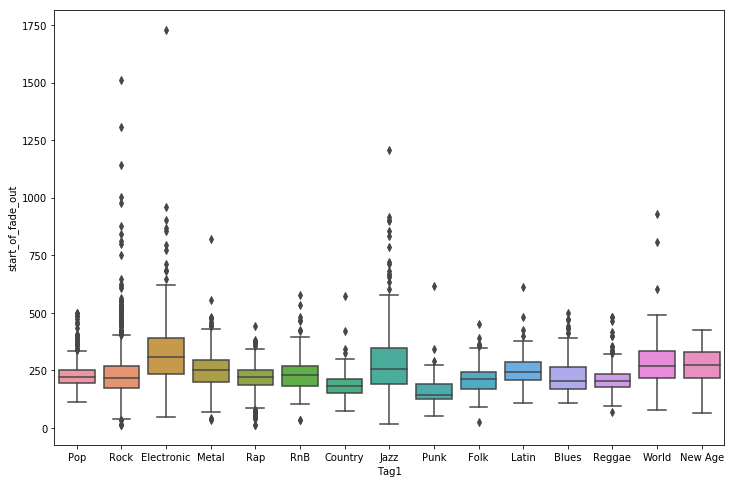

In [38]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='start_of_fade_out', ax = ax)

We can observe that Punk seems to have the comparitively different and small mean values for start of fade out.

#### Tempo

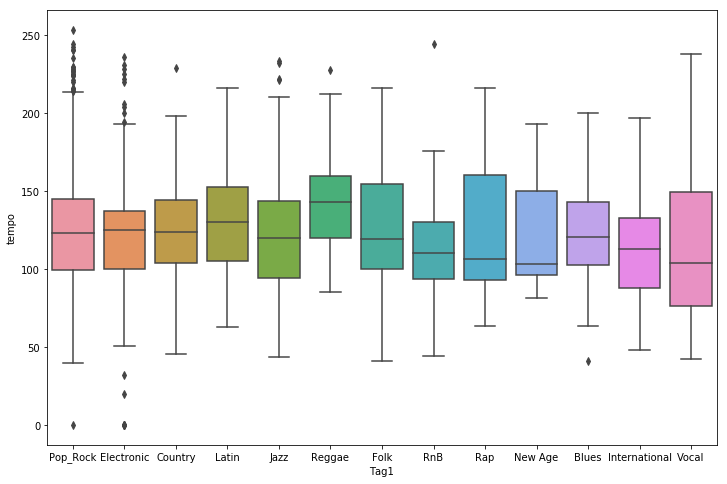

In [40]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=df_m, x='Tag1', y='tempo', ax = ax)

We can observe that Reggae seems to have the drastically different and higher mean values for Tempo.

### Now to visualize the categoricals

#### Mode

In [40]:
sub = df_m[['mode', 'Tag1']]

In [43]:
sub.vals =  sub.groupby(['mode','Tag1']).size()
sub.vals

mode  Tag1      
0     Blues           35
      Country         33
      Electronic     240
      Folk            25
      Jazz           151
      Latin           34
      Metal           84
      New Age         12
      Pop            116
      Punk            21
      Rap            112
      Reggae          78
      RnB             93
      Rock           551
      World           26
1     Blues          127
      Country        195
      Electronic     303
      Folk            74
      Jazz           217
      Latin           50
      Metal          133
      New Age         20
      Pop            228
      Punk            66
      Rap            161
      Reggae         114
      RnB            147
      Rock          1250
      World           30
dtype: int64

In [44]:
values = sub.vals.values.reshape(15,2)

In [45]:
df = pd.DataFrame(values, index=sub['Tag1'].unique(), columns=[0,1])

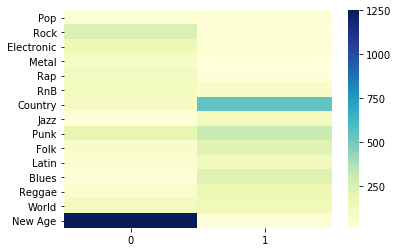

In [46]:
sns.heatmap(df,cmap="YlGnBu")

#### Time Signature

In [47]:
sub = df_m[['time_signature', 'Tag1']]

In [48]:
tally = pd.crosstab(sub['Tag1'],sub['time_signature'])
tally = tally.iloc[:, 1:]
tally

time_signature,1,3,4,5,7
Tag1,,,,,
Blues,42,33,83,3,1
Country,29,34,160,3,2
Electronic,46,58,388,34,17
Folk,14,24,54,5,2
Jazz,46,66,201,41,14
Latin,5,9,61,4,5
Metal,22,25,151,9,10
New Age,2,7,20,2,1
Pop,28,29,266,18,3


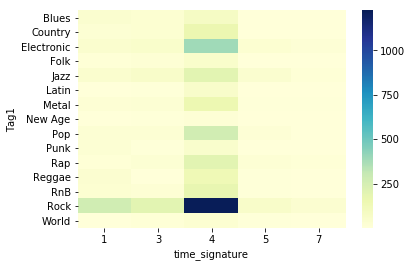

In [49]:
sns.heatmap(tally, cmap="YlGnBu")

#### End of fade in vs. Duration

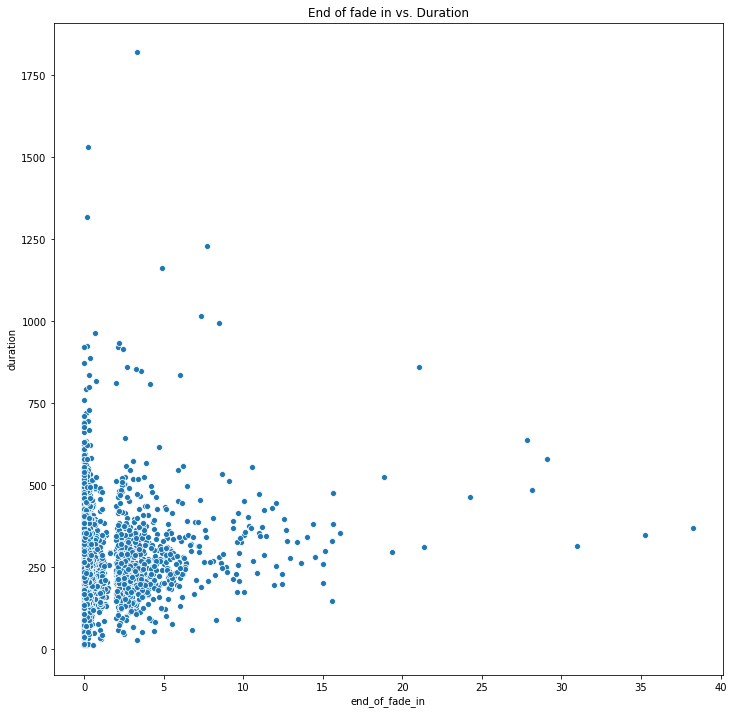

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="end_of_fade_in", y="duration",data=df_m).set_title('End of fade in vs. Duration')

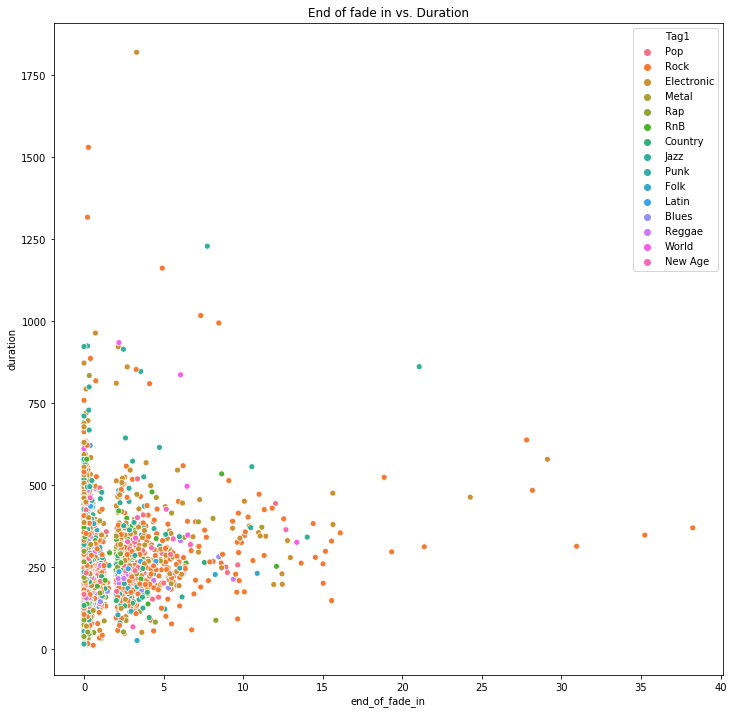

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="end_of_fade_in", y="duration",hue = "Tag1", data=df_m).set_title('End of fade in vs. Duration')

#### Start of fade out vs. Duration

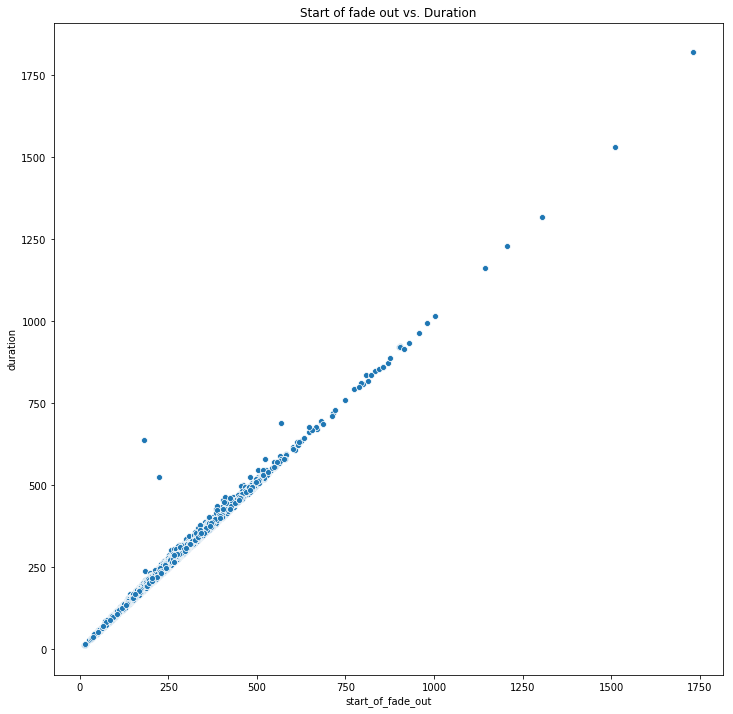

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="start_of_fade_out", y="duration",data=df_m).set_title('Start of fade out vs. Duration')

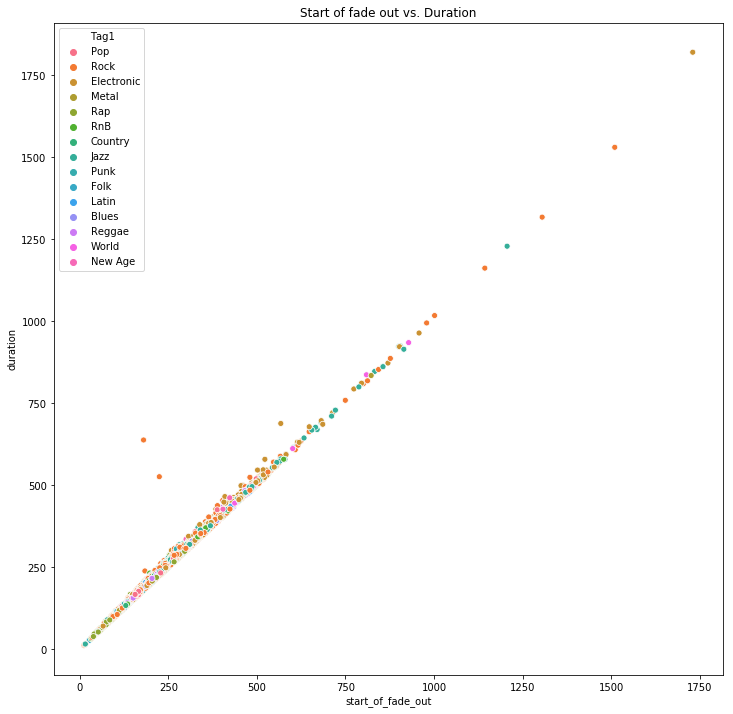

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sc5 = sns.scatterplot(x="start_of_fade_out", y="duration",hue = "Tag1", data=df_m).set_title('Start of fade out vs. Duration')

Given high correlation between the duration and the start of fade out, we plan to just keep the duration column

#### Correlation matrix

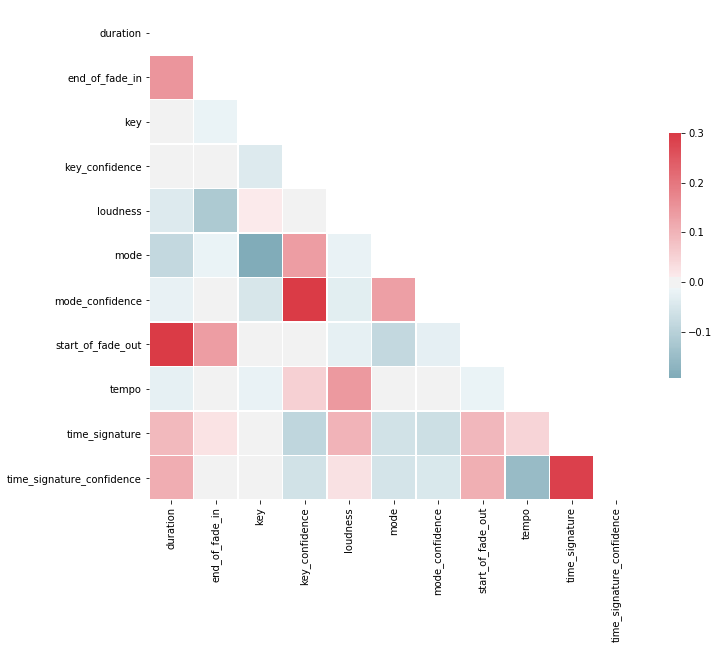

In [80]:
#Numerical values data frame
d= df_m.drop(columns = ["Tag1"])

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

High correlation between Duration and Start of fade out is re-validated here. We can also observe that mode confidence and key confidence are highly correlated. As, are time signature confidence and time signature.